<a href="https://colab.research.google.com/github/aisyahdnn/Skripsi/blob/master/Dataset2080.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#untuk menghubungkan drive ke colab

from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import numpy as np
import math
import os
import matplotlib.pyplot as plt
import cv2

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from skimage import io
from skimage import feature

In [3]:
terinfeksi_data = os.listdir('/content/drive/My Drive/Dataset/DATA2080/Terinfeksi')
print(terinfeksi_data)

print('\n')

tidakTerinfeksi_data = os.listdir('/content/drive/My Drive/Dataset/DATA2080/TidakTerinfeksi')
print(tidakTerinfeksi_data)

['C33P1thinF_IMG_20150619_114756a_cell_179.png', 'C33P1thinF_IMG_20150619_114756a_cell_182.png', 'C33P1thinF_IMG_20150619_114756a_cell_181.png', 'C33P1thinF_IMG_20150619_114756a_cell_180.png', 'C33P1thinF_IMG_20150619_115740a_cell_163.png', 'C33P1thinF_IMG_20150619_115740a_cell_162.png', 'C33P1thinF_IMG_20150619_115740a_cell_161.png', 'C33P1thinF_IMG_20150619_115808a_cell_205.png', 'C33P1thinF_IMG_20150619_115808a_cell_206.png', 'C33P1thinF_IMG_20150619_120645a_cell_217.png', 'C33P1thinF_IMG_20150619_120645a_cell_216.png', 'C33P1thinF_IMG_20150619_120645a_cell_215.png', 'C33P1thinF_IMG_20150619_120742a_cell_210.png', 'C33P1thinF_IMG_20150619_120804a_cell_224.png', 'C33P1thinF_IMG_20150619_120838a_cell_222.png', 'C33P1thinF_IMG_20150619_121102a_cell_193.png', 'C33P1thinF_IMG_20150619_121229a_cell_178.png', 'C33P1thinF_IMG_20150619_121229a_cell_179.png', 'C33P1thinF_IMG_20150619_121229a_cell_177.png', 'C33P1thinF_IMG_20150619_121300a_cell_156.png', 'C33P1thinF_IMG_20150619_121411a_cell_1

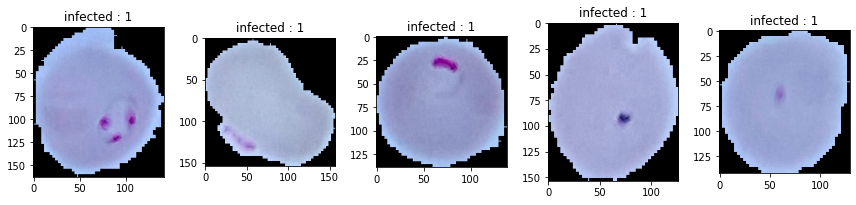

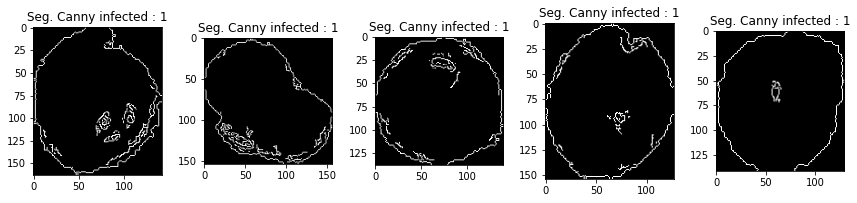

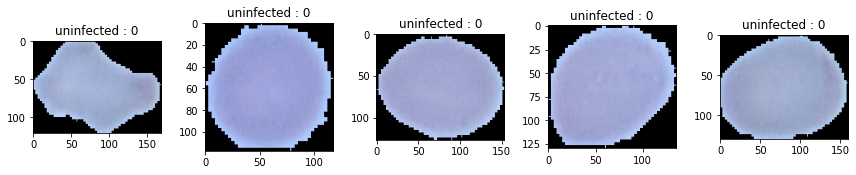

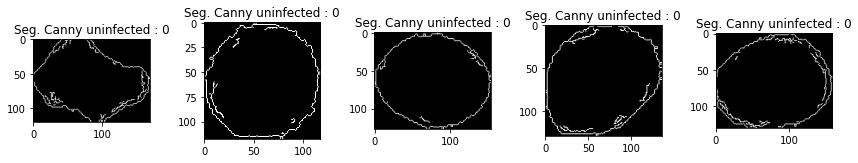

In [4]:
#Tahap Visualisasi Citra Malaria Terinfeksi

plt.figure(figsize = (12,12))
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = cv2.imread('/content/drive/My Drive/Dataset/DATA2080/Terinfeksi' + "/" + terinfeksi_data[i])
    plt.imshow(img,cmap='gray')
    plt.title('infected : 1')
    plt.tight_layout()

plt.figure(figsize = (12,12))
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = cv2.imread('/content/drive/My Drive/Dataset/DATA2080/Terinfeksi' + "/" + terinfeksi_data[i])
    edges = cv2.Canny(img,80,30)
    plt.imshow(edges,cmap='gray')
    plt.title('Seg. Canny infected : 1')
    plt.tight_layout()


#Tahap Visualisasi Citra Malaria Tidak Terinfeksi

plt.figure(figsize = (12,12))
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = cv2.imread('/content/drive/My Drive/Dataset/DATA2080/TidakTerinfeksi' + "/" + tidakTerinfeksi_data[i])
    plt.imshow(img,cmap='gray')
    plt.title('uninfected : 0')
    plt.tight_layout()

plt.figure(figsize = (12,12))
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = cv2.imread('/content/drive/My Drive/Dataset/DATA2080/TidakTerinfeksi' + "/" + tidakTerinfeksi_data[i])
    edges = cv2.Canny(img,80,30)
    plt.imshow(edges,cmap='gray')
    plt.title('Seg. Canny uninfected : 0')
    plt.tight_layout()
plt.show()

In [0]:
#SEGMENTASI CANNY DAN EKSTRAKSI HUMOMENT

x = np.array([['H1','H2','H3','H4','H5','H6','H7','Actual']])

#Proses Citra Malaria Terinfeksi
for i in range(len(terinfeksi_data)):
    img = cv2.imread('/content/drive/My Drive/Dataset/DATA2080/Terinfeksi' + "/" + terinfeksi_data[i])
    edges = cv2.Canny(img,80,30)
    a = cv2.HuMoments(cv2.moments(edges)).flatten()
    a = np.append(a,1)
    x = np.vstack((x,a))

#Proses Citra Malaria TidakTerinfeksi
for i in range(len(tidakTerinfeksi_data)):
    img = cv2.imread('/content/drive/My Drive/Dataset/DATA2080/TidakTerinfeksi' + "/" + tidakTerinfeksi_data[i])
    edges = cv2.Canny(img,80,30)
    a = cv2.HuMoments(cv2.moments(edges)).flatten()
    a = np.append(a,0)
    x = np.vstack((x,a))

In [0]:
#EXPORT to CSV
np.savetxt("/content/drive/My Drive/Dataset/DatasetMalaria2080.csv", x, fmt='%s',delimiter=',' )

In [7]:
#LOAD CSV DATASET

dataset = pd.read_csv('/content/drive/My Drive/Dataset/DatasetMalaria2080.csv')
print (len(dataset))
print (dataset)

1000
           H1            H2            H3  ...            H6            H7  Actual
0    0.013520  4.105438e-07  5.353142e-08  ...  2.694405e-10  6.253417e-14     1.0
1    0.016134  5.471398e-06  4.302842e-07  ... -1.335775e-10 -1.873219e-13     1.0
2    0.018783  2.231958e-06  5.393779e-08  ...  3.336873e-10  1.835801e-14     1.0
3    0.023085  3.748378e-05  1.083478e-07  ...  1.259026e-10 -8.148153e-16     1.0
4    0.032724  9.360229e-06  6.084419e-08  ... -4.993850e-10 -1.713192e-14     1.0
..        ...           ...           ...  ...           ...           ...     ...
995  0.017398  1.109720e-07  8.671000e-08  ...  2.606190e-11  6.759157e-15     0.0
996  0.014934  8.482377e-06  1.876040e-08  ...  2.335854e-11 -7.265898e-17     0.0
997  0.014418  1.121343e-05  8.411207e-08  ...  5.602203e-10 -5.981688e-15     0.0
998  0.019914  8.530760e-05  1.261099e-07  ... -5.104449e-10 -4.985950e-15     0.0
999  0.017790  1.713286e-05  2.010869e-08  ...  8.146109e-11  9.439136e-16     0.0

In [8]:
#split target and attribute (membagi data)
x = dataset.iloc[:, 0:7] #mulai dr colmn index ke0, sbnyk 7 colmn msuk ke var (X)
y = dataset.iloc[:, 7] #hny colmn  index ke7 yg msuk ke var (Y)


#split train n test dataset
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=2, test_size=0.1)

print(len(y_test))
print(len(x_train))
print(len(dataset))
x

100
900
1000


,H1,H2,H3,H4,H5,H6,H7
0,0.013520,4.105438e-07,5.353142e-08,4.211064e-07,-9.324107e-15,2.694405e-10,6.253417e-14
1,0.016134,5.471398e-06,4.302842e-07,4.716702e-07,1.003089e-13,-1.335775e-10,-1.873219e-13
2,0.018783,2.231958e-06,5.393779e-08,3.262890e-07,-3.920058e-14,3.336873e-10,1.835801e-14
3,0.023085,3.748378e-05,1.083478e-07,2.212270e-08,-7.135643e-16,1.259026e-10,-8.148153e-16
4,0.032724,9.360229e-06,6.084419e-08,1.992984e-07,1.371664e-14,-4.993850e-10,-1.713192e-14
...,...,...,...,...,...,...,...
995,0.017398,1.109720e-07,8.671000e-08,9.053971e-08,4.320812e-15,2.606190e-11,6.759157e-15
996,0.014934,8.482377e-06,1.876040e-08,8.021815e-09,-6.636858e-17,2.335854e-11,-7.265898e-17
997,0.014418,1.121343e-05,8.411207e-08,2.111069e-07,2.748753e-14,5.602203e-10,-5.981688e-15
998,0.019914,8.530760e-05,1.261099e-07,6.656184e-08,-3.511440e-15,-5.104449e-10,-4.985950e-15


0.0    720
1.0    180
Name: Actual, dtype: int64
0.0    80
1.0    20
Name: Actual, dtype: int64


Text(0.5, 1.0, 'TESTING')

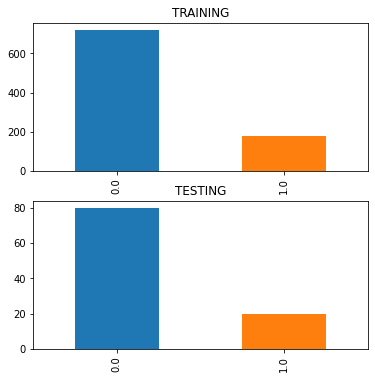

In [9]:
print(y_train.value_counts()) #mnmpilkn jum.data y_train brdsrkn value

print(y_test.value_counts())  #mnmpilkn jum.data y_test brdsrkn value


plt.figure(figsize=(6,6)) #mngtur ukuran skla grafik

#mnmpilkn visualisasi grafik
plt.subplot(2,1,1);y_train.value_counts().plot(kind='bar', color=['C0','C1','C2','C3','C4','C5','C6']);plt.title('TRAINING')
plt.subplot(2,1,2);y_test.value_counts().plot(kind='bar', color=['C0','C1','C2','C3','C4','C5','C6']);plt.title('TESTING')

In [10]:
#scaling data
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)

x_test = sc_x.transform(x_test)
x_train

array([[-1.07105465e+00, -7.54082777e-01, -4.91113905e-01, ...,
        -2.76913265e-02, -2.58593212e-01,  3.06362920e-03],
       [-9.39611760e-01, -7.44058597e-01, -6.03645811e-01, ...,
        -2.72242412e-02, -2.59511487e-01,  3.15538052e-03],
       [-8.28823107e-01, -6.60663600e-01,  1.19436375e-01, ...,
        -1.90540501e-02, -2.73088346e-01, -4.08941273e-04],
       ...,
       [ 4.98088790e-01, -5.18151598e-01,  4.09927033e-01, ...,
         2.38956980e-01,  2.62747081e-02, -1.76833408e-01],
       [ 1.20434606e+00, -6.27527316e-01,  2.78058369e-01, ...,
         4.43056360e-01, -3.73585104e-01,  7.86727859e-03],
       [-8.60968181e-01, -1.08575220e-01, -4.95280068e-01, ...,
         3.30749225e-01,  1.10474049e+00, -4.58779226e-01]])

In [11]:
math.sqrt(len(y_test))

10.0

In [12]:
#choose method and fitting
classifier = KNeighborsClassifier(n_neighbors=4,p=2,metric='euclidean')
classifier.fit (x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [13]:
#proses testing

#hasil prediksi/testing dismpn ke (y_pred)
y_pred = classifier.predict(x_test)
y_pred

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [14]:
#print result
cm = confusion_matrix(y_test, y_pred)
print (cm)
print("Akurasi :" , accuracy_score(y_test, y_pred))
print("presisi :" , precision_score(y_test, y_pred))
print("recall :" , recall_score(y_test, y_pred))
print("F-Measure :" , f1_score(y_test, y_pred))

[[80  0]
 [12  8]]
Akurasi : 0.88
presisi : 1.0
recall : 0.4
F-Measure : 0.5714285714285715


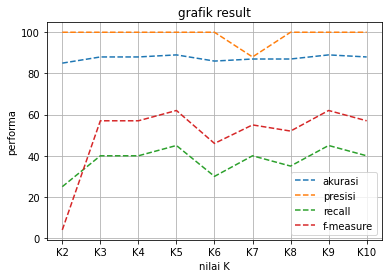

In [15]:
from matplotlib import pyplot as plt
x = ["K2", "K3", "K4", "K5", "K6", "K7", "K8", "K9", "K10"]
a = [85, 88, 88, 89, 86, 87, 87, 89, 88]
p = [100, 100, 100, 100, 100, 88, 100, 100, 100]
r = [25, 40, 40, 45, 30, 40, 35, 45, 40]
f = [4, 57, 57, 62, 46, 55, 52, 62, 57]
plt.plot(x, a, '--')
plt.plot(x, p, '--')
plt.plot(x, r, '--')
plt.plot(x, f, '--')
plt.title("grafik result")
plt.xlabel("nilai K")
plt.ylabel("performa")
plt.legend(["akurasi", "presisi", "recall", "f-measure"])
plt.grid()
plt.show()